In [40]:
import numpy as np
import matplotlib.pyplot  as plt
import cv2
import os

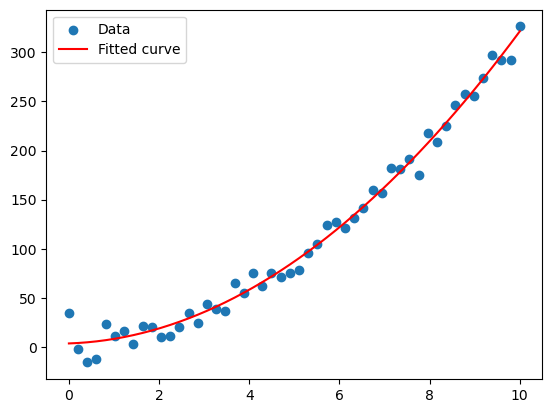

In [41]:

# 生成示例数据
x = np.linspace(0, 10, 50)
y = 3 * x**2 + 2 * x + 1 + np.random.normal(0, 10, size=x.shape)

# 使用numpy.polyfit进行二次多项式拟合
coefficients = np.polyfit(x, y, 2)

# 生成拟合曲线
p = np.poly1d(coefficients)
y_fit = p(x)

# 绘制原始数据和拟合曲线
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, color='red', label='Fitted curve')
plt.legend()
plt.show()

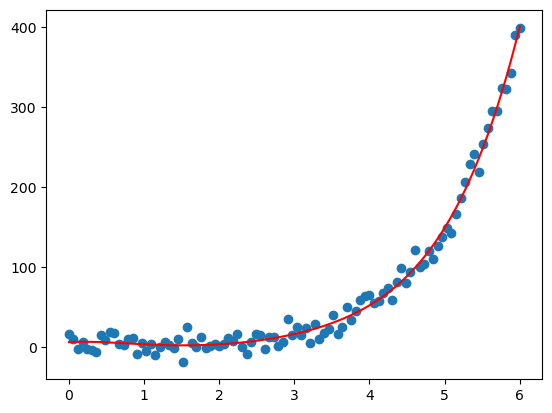

In [42]:
x = np.linspace(0, 6, 100)
y = np.exp(x) + np.random.normal(0, 10, size=x.shape)
fit_out = np.polyfit(x, y, 5) # 阶次越高 拟合越准
p = np.poly1d(fit_out)
y_fit = p(x)

plt.scatter(x, y)
plt.plot(x, y_fit, color='red')
plt.show()

d:\Workspace\Opencv\Numpy_learn\picture\lane.jpg


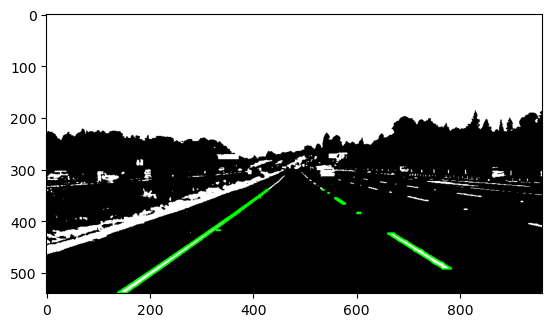

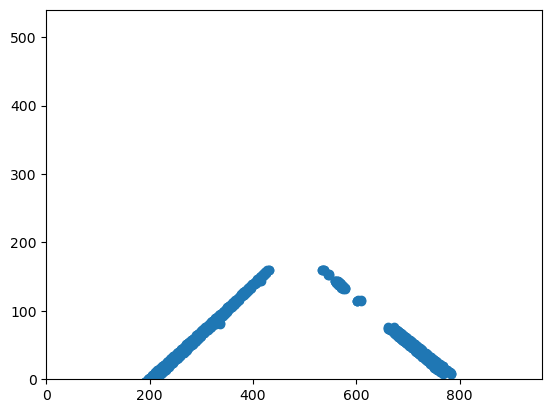

In [43]:
path = os.getcwd()
img_path = os.path.join(path, "picture", "lane.jpg")
print(img_path)
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, img_thr = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
img_RGB = cv2.cvtColor(img_thr, cv2.COLOR_GRAY2BGR)
points = np.array([[399, 340], [564, 340], [885, img.shape[0]], [120, img.shape[0]]])
img_black = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
mask_img = cv2.fillPoly(img_black, [points], [255])
img_bit_add = cv2.bitwise_and(img_thr,img_thr,mask=mask_img)
contours, n = cv2.findContours(img_bit_add, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img_RGB, contours, -1, (0, 255, 0), 2)

contour_x = []
contour_y = []

for contour in contours:
    for con in contour:
        # print(con[0,0])
        contour_x.append(con[0,0])
        contour_y.append(con[0,1])

plt.figure(1)
plt.imshow(img_RGB, cmap=None)
plt.show()

plt.figure(2)
plt.scatter(contour_x, [500 - x for x in contour_y])
plt.xlim(0, img.shape[1])
plt.ylim(0, img.shape[0])
plt.show()

<Figure size 640x480 with 0 Axes>

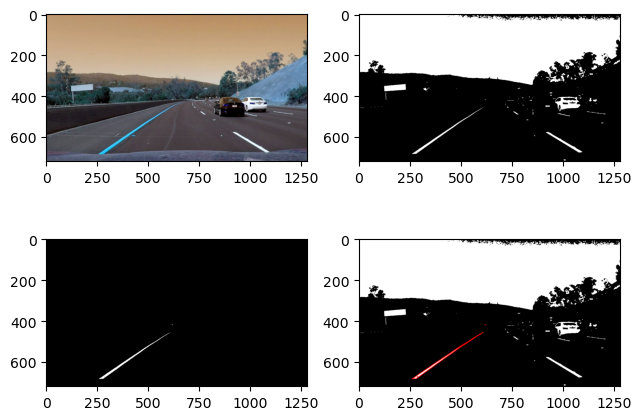

In [44]:
path = os.getcwd()
video_path = os.path.join(path, "picture", "cv2_curve.mp4")
video = cv2.VideoCapture(video_path)
ret, frame = video.read()
img_blur = cv2.GaussianBlur(frame, [5, 5], 1)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
ret, img_thr = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
img_black = np.zeros((frame.shape[0], frame.shape[1]), np.uint8)
points = np.array([[500, 350], [int(frame.shape[1]/2), 350], [int(frame.shape[1]/2), frame.shape[0]], [200, frame.shape[0]]])
img_mask = cv2.fillPoly(img_black, [points], [255])
img_bit_add = cv2.bitwise_and(img_thr, img_thr,mask=img_mask)
img_thr_to_RGB = cv2.cvtColor(img_thr, cv2.COLOR_GRAY2BGR)

contours, n = cv2.findContours(img_bit_add, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_thr_to_RGB, contours, -1, (255, 0, 0), 2)

plt.figure(1)
fig, ((img1, img2), (img3, img4)) = plt.subplots(2, 2)
img1.imshow(frame, cmap=None)
img2.imshow(img_thr, cmap='gray')
img3.imshow(img_bit_add, cmap="gray")
img4.imshow(img_thr_to_RGB, cmap='gray')

plt.figure(2)

plt.tight_layout()
plt.show()
